In [1]:
# Importing Libraries

import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from geopy.distance import geodesic
from pyproj import Geod
import seaborn as sns
from math import sin, cos, sqrt, atan2, radians
import dask.dataframe as dd
import platform
import geopy.distance as gp
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV

train_data = pd.read_csv('train.csv')

In [3]:
# Visually inspecting the data

print(train_data.head())
print('\n')
print(train_data.shape)
print('\n')
print(train_data.info())
print('\n')
print(train_data.describe())
print('\n')
print(train_data.isnull().sum())
print('\n')

                             key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3       

In [4]:
#Counting the values in passenger_count column

train_data.passenger_count.value_counts(dropna=False)

1      38337524
2       8175243
5       3929346
3       2432712
4       1178852
6       1174647
0        195416
208          64
9            23
7            15
8             9
129           2
51            1
49            1
34            1
Name: passenger_count, dtype: int64

In [5]:
#Counting the values in pickup_datetime column

train_data.pickup_datetime.value_counts(dropna=False)

2013-11-03 01:29:00 UTC    62
2009-11-01 01:17:00 UTC    62
2010-11-07 01:01:00 UTC    60
2009-11-01 01:05:00 UTC    59
2010-11-07 01:10:00 UTC    59
2010-11-07 01:05:00 UTC    58
2010-11-07 01:00:00 UTC    57
2014-03-13 20:11:00 UTC    57
2009-11-01 01:45:00 UTC    56
2013-04-26 20:15:00 UTC    55
2010-04-16 20:37:00 UTC    55
2013-11-03 01:11:00 UTC    55
2010-11-07 01:35:00 UTC    55
2013-11-03 01:09:00 UTC    55
2009-11-01 01:31:00 UTC    54
2010-02-23 18:38:00 UTC    54
2009-11-01 01:41:00 UTC    54
2013-11-23 23:14:00 UTC    54
2013-04-19 18:34:00 UTC    54
2009-10-21 19:01:00 UTC    54
2012-03-09 22:06:00 UTC    53
2013-04-20 00:49:00 UTC    53
2013-04-20 22:33:00 UTC    53
2013-04-19 19:17:00 UTC    53
2012-09-22 21:51:00 UTC    53
2009-11-01 01:38:00 UTC    53
2013-04-20 23:54:00 UTC    53
2013-04-27 23:58:00 UTC    53
2012-06-06 19:47:00 UTC    53
2009-11-01 01:02:00 UTC    53
                           ..
2011-07-16 13:26:08 UTC     1
2013-07-04 03:12:40 UTC     1
2011-11-10

In [6]:
#Counting the values in fare_amount column

train_data.fare_amount.value_counts(dropna=False)

 6.50      2691783
 4.50      2270305
 8.50      2080476
 5.30      1623420
 5.70      1620795
 6.10      1578275
 4.90      1571360
 6.90      1445389
 10.50     1408721
 7.30      1361582
 7.70      1268537
 4.10      1175806
 8.10      1175770
 7.00      1159454
 6.00      1155132
 5.50      1122703
 7.50      1113201
 8.00      1056206
 5.00      1028036
 8.90       975650
 9.00       946448
 12.50      938777
 9.30       889903
 9.50       875406
 9.70       809765
 3.70       808442
 10.00      803013
 10.10      736606
 11.00      681711
 14.50      635346
            ...   
 310.10          1
 71.74           1
 71.01           1
 64.74           1
 70.51           1
-67.50           1
-67.00           1
 279.65          1
 275.60          1
 262.60          1
 269.60          1
 269.35          1
 269.10          1
-64.00           1
 306.60          1
 65.01           1
 319.60          1
 293.60          1
 290.90          1
 479.35          1
 476.10          1
 459.90     

In [7]:
#Fare amount has some negative values

train_data[train_data.fare_amount<0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,2010-03-09 23:37:10.0000005,-2.90,2010-03-09 23:37:10 UTC,-73.789450,40.643498,-73.788665,40.641952,1
2486,2015-03-22 05:14:27.0000001,-2.50,2015-03-22 05:14:27 UTC,-74.000031,40.720631,-73.999809,40.720539,1
13032,2013-08-30 08:57:10.0000002,-3.00,2013-08-30 08:57:10 UTC,-73.995062,40.740755,-73.995885,40.741357,4
28839,2013-08-11 13:39:10.0000001,-2.50,2013-08-11 13:39:10 UTC,-73.785260,40.648442,0.000000,0.000000,1
36722,2015-04-30 15:19:45.0000003,-2.50,2015-04-30 15:19:45 UTC,-73.952187,40.790112,-73.950043,40.792839,1
42337,2015-03-09 10:29:46.0000004,-5.00,2015-03-09 10:29:46 UTC,-73.990974,40.755985,-73.980820,40.759869,1
56748,2015-06-26 01:13:18.0000002,-5.00,2015-06-26 01:13:18 UTC,-73.979797,40.743240,-73.981216,40.737240,6
58937,2010-02-19 23:47:10.0000002,-44.90,2010-02-19 23:47:10 UTC,-73.871120,40.773902,-73.676533,40.786890,1
97838,2015-06-07 02:54:14.0000004,-3.00,2015-06-07 02:54:14 UTC,-73.913246,40.766212,-73.914963,40.764065,5
102938,2010-02-10 12:33:10.0000004,-2.90,2010-02-10 12:33:10 UTC,-73.970775,40.783425,-73.973443,40.779775,1


In [8]:
# Dropping Null Values

print('Old size: %d' % len(train_data))
train_data = train_data.dropna(how = 'any', axis = 'rows')
print('New size: %d' % len(train_data))

Old size: 55423856
New size: 55423480


In [9]:
# Removing passenger_count = 0 

print('Old size: %d' % len(train_data))
train_data = train_data[train_data.passenger_count>=1]
print('New size: %d' % len(train_data))

Old size: 55423480
New size: 55228440


In [10]:
# Removing passenger_count greater than 6

print('Old size: %d' % len(train_data))
train_data = train_data[train_data.passenger_count<=6]
print('New size: %d' % len(train_data))

Old size: 55228440
New size: 55228324


In [11]:
# Removing 0 fare_amount

print('Old size: %d' % len(train_data))
train_data = train_data[train_data.fare_amount>=1.0]
print('New size: %d' % len(train_data))

Old size: 55228324
New size: 55223859


In [12]:
# Removing 0 pickup_longitude, pickup_longitude, dropoff_longitude, dropoff_latitude

print('Old size: %d' % len(train_data))
train_data = train_data[((train_data) != 0).all(1)]
print('New size: %d' % len(train_data))

Old size: 55223859
New size: 54124162


In [13]:
# Removing fare_amount greater than 1000.00

print('Old size: %d' % len(train_data))
train_data = train_data[train_data.fare_amount<=1000.00]
print('New size: %d' % len(train_data))

Old size: 54124162
New size: 54124153


In [14]:
#Exporting cleaned training data to a new csv

train_data.to_csv('train_cleaned.csv')

In [2]:
# Read Cleaned Data

train_data = pd.read_csv('train_cleaned.csv')

In [3]:
# dropping the Unnamed column

train_data = train_data.drop(['Unnamed: 0'], axis=1)

In [4]:
# Visually inspecting the data

print(train_data.head())
print('\n')
print(train_data.shape)
print('\n')
print(train_data.info())
print('\n')
print(train_data.describe())
print('\n')
print(train_data.isnull().sum())
print('\n')

                             key  fare_amount          pickup_datetime  \
0    2009-06-15 17:26:21.0000001          4.5  2009-06-15 17:26:21 UTC   
1    2010-01-05 16:52:16.0000002         16.9  2010-01-05 16:52:16 UTC   
2   2011-08-18 00:35:00.00000049          5.7  2011-08-18 00:35:00 UTC   
3    2012-04-21 04:30:42.0000001          7.7  2012-04-21 04:30:42 UTC   
4  2010-03-09 07:51:00.000000135          5.3  2010-03-09 07:51:00 UTC   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.844311        40.721319         -73.841610         40.712278   
1        -74.016048        40.711303         -73.979268         40.782004   
2        -73.982738        40.761270         -73.991242         40.750562   
3        -73.987130        40.733143         -73.991567         40.758092   
4        -73.968095        40.768008         -73.956655         40.783762   

   passenger_count  
0                1  
1                1  
2                2  
3       

In [5]:
# Defining distance function
wgs84_geod = Geod(ellps='WGS84') #Distance will be measured on this ellipsoid - more accurate than a spherical method

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = wgs84_geod.inv(lon1,lat1,lon2,lat2) #Yes, this order is correct
  return dist

In [6]:
train_data['dist'] = Distance(train_data['pickup_latitude'].tolist(),train_data['pickup_longitude'].tolist(),train_data['dropoff_latitude'].tolist(),train_data['dropoff_longitude'].tolist())

In [7]:
# Conver Meters to Miles
train_data['dist'] = train_data['dist'] * 0.000621371

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54124153 entries, 0 to 54124152
Data columns (total 9 columns):
key                  object
fare_amount          float64
pickup_datetime      object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      int64
dist                 float64
dtypes: float64(6), int64(1), object(2)
memory usage: 3.6+ GB


In [9]:
train_data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.639764
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,5.246510
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.863166
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,1.737223
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,1.241709


In [10]:
print(train_data.describe())

        fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count  5.412415e+07      5.412415e+07     5.412415e+07       5.412415e+07   
mean   1.133284e+01     -7.391646e+01     4.069292e+01      -7.391484e+01   
std    9.702905e+00      7.863687e+00     7.508244e+00       7.890891e+00   
min    1.000000e+00     -3.442060e+03    -3.492264e+03      -3.442025e+03   
25%    6.000000e+00     -7.399228e+01     4.073652e+01      -7.399158e+01   
50%    8.500000e+00     -7.398209e+01     4.075335e+01      -7.398059e+01   
75%    1.250000e+01     -7.396826e+01     4.076754e+01      -7.396528e+01   
max    9.780000e+02      3.457626e+03     3.408790e+03       3.457622e+03   

       dropoff_latitude  passenger_count          dist  
count      5.412415e+07     5.412415e+07  5.412286e+07  
mean       4.069177e+01     1.691439e+00  2.819885e+00  
std        7.640011e+00     1.307344e+00  4.984387e+01  
min       -3.493652e+03     1.000000e+00  0.000000e+00  
25%        4.073551e+

In [16]:
#Exporting training data with new dist feature to a new csv

train_data.to_csv('train_features.csv')

In [ ]:
# Read Cleaned Data

train_data = pd.read_csv('train_features.csv')

In [ ]:
# dropping the Unnamed column

train_data = train_data.drop(['Unnamed: 0'], axis=1)

# NYC Taxi Fare Prediction - Data Story

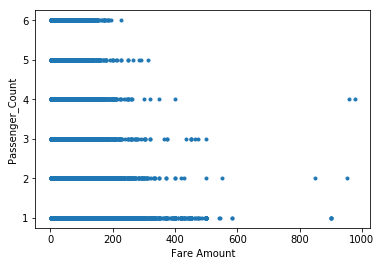

In [11]:
# Plot a scatter plot - Fare_Amount vs Passenger_Count

_ = plt.plot(train_data['fare_amount'], train_data['passenger_count'], marker='.',linestyle='none')
_ = plt.xlabel('Fare Amount')
_ = plt.ylabel('Passenger_Count')
# Show the plot
plt.show()

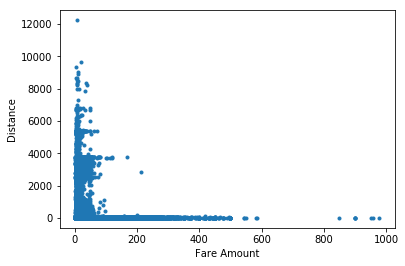

In [12]:
# Plot a scatter plot - Fare_Amount vs dist

_ = plt.plot(train_data['fare_amount'], train_data['dist'], marker='.',linestyle='none')
_ = plt.xlabel('Fare Amount')
_ = plt.ylabel('Distance')
# Show the plot
plt.show()

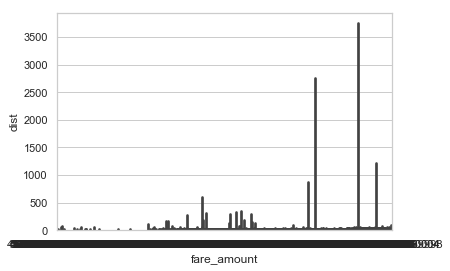

In [13]:
# Barplot - Fare_Amount vs dist

sns.set(style="whitegrid")
ax = sns.barplot(x="fare_amount", y="dist", data=train_data)

In [15]:
#sns.catplot(x="passenger_count", y="fare_amount", hue="dist",
#            col="pickup_datetime", aspect=.6,kind="swarm", data=train_data)

In [ ]:
#sns.distplot(x, bins=20, kde=False, rug=True)

In [ ]:
titanic = sns.load_dataset("titanic")
titanic

In [ ]:
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)